<a href="https://colab.research.google.com/github/trujoan/Simulacion-de-procesos-Quimica/blob/main/Taller_3_%E2%80%93_Introducci%C3%B3n_a_operaciones_unitarias_y_optimizaci%C3%B3n_de_procesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere el siguiente diagrama de flujo:

Las corrientes de alimentación tienen especies puras “A” y “B” y se mezclan con una corriente de reciclo.
La corriente resultante se alimenta a un reactor CSTR donde las siguientes reacciones se llevan a cabo:


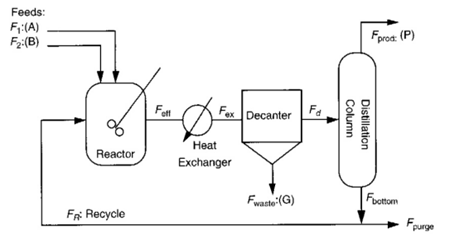

𝐴 + 𝐵 → 2𝐶

2𝐶 + 𝐵 → 𝑃 + 2𝐸

3𝑃 + 𝐶 → 2𝐺


“C” es un producto intermedio, “E” es un subproducto, “P” es el producto de interés y “G” es un desecho
aceitoso. Tanto “C” como “E” pueden ser vendidos por su valor como combustible, mientras que “G” debe
ser desechado, lo cual implica un costo. La planta consiste en un reactor, un intercambiador de calor para
enfriar los efluentes del reactor, un decantador para separar “G” de la mezcla, y una torre de destilación
para separar “P”. Debido a la formación de un azeótropo, algunos de los productos (aproximadamente el
10% del flujo másico de “E”) se retienen en los fondos de la columna. La mayor parte de esos fondos se
recirculan al reactor y lo demás se usa como combustible. La planta completa puede ser modelada sin un
balance de energía y se puede simplificar aún más el problema al considerar sólo reacciones isotérmicas en
la manufactura de “P”.
Adicionalmente se puede asumir que las reacciones son elementales, por lo que se conocería su cinética.
Lo anterior aplica si se expresa la concentración como una fracción másica. La temperatura es de 674 R y
la densidad de la mezcla es de 50 lb/ft3
. El factor pre-exponencial depende de la temperatura según las
siguientes ecuaciones:


𝑘1 = 5.9755 ∙ 109𝑒
(
−12000
𝑇
)
ℎ
−1𝑥𝑚
−1

𝑘2 = 2.5962 ∙ 1012𝑒
(
−15000
𝑇
)
ℎ
−1𝑥𝑚
−1

𝑘3 = 9.6283 ∙ 1015𝑒
(
−20000
𝑇
)
ℎ
−1𝑥𝑚
−1

Se debe de ejecutar e instalar GEKKO para realizar los ejercicios que preceden. (Recordar que la cantidad de iteraciones son las veces que se ejecuta GEKKO para buscar la solución de ecuación y a su vez este no corre después de 250 iteraciones)

In [ ]:
try:
    # import gekko if installed
    from gekko import GEKKO
except:
    # install gekko if error on try
    !pip install gekko
    from gekko import GEKKO

# package information
!pip show gekko

# upgrade GEKKO to latest version
# !pip install --upgrade gekko

Name: gekko
Version: 1.0.6
Summary: Machine learning and optimization for dynamic systems
Home-page: https://github.com/BYU-PRISM/GEKKO
Author: BYU PRISM Lab
Author-email: support@apmonitor.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 


1. Después del análisis inicial, te das cuenta de que el sistema posee 4 grados de libertad. Si se ajusta
𝐹1 = 658.2 lb/h (100% A), 𝐹2 = 1499.56 lb/h (100% B), V = 1000 ft3 y una fracción de separación
en la salida de la torre de 0.1. Resuelva el sistema por un método numérico adecuado para el
problema.

In [ ]:
# PLANTEAMIENTO
# Iniciar Gekko
m = GEKKO()
m.options.SOLVER = 3

import numpy as np
import math
from math import e

# VARIABLES

# REACTOR

XEFFA = m.Var(value=0, lb=0, ub=1)
XEFFB = m.Var(value=0, lb=0, ub=1)
XEFFC = m.Var(value=0, lb=0, ub=1)
XEFFP = m.Var(value=0, lb=0, ub=1)
XEFFE = m.Var(value=0, lb=0, ub=1)
XEFFG = m.Var(value=0, lb=0, ub=1)

FEFFA = m.Var()
FEFFB = m.Var()
FEFFC = m.Var()
FEFFP = m.Var()
FEFFE = m.Var()
FEFFG = m.Var()

FEFFTOT = m.Var()

# INTERCAMBIADOR

FEXA = m.Var()
FEXB = m.Var()
FEXC = m.Var()
FEXP = m.Var()
FEXE = m.Var()
FEXG = m.Var()

# DECANTADOR

FWA = m.Var()
FWB = m.Var()
FWC = m.Var()
FWP = m.Var()
FWE = m.Var()
FWG = m.Var()

FDA = m.Var()
FDB = m.Var()
FDC = m.Var()
FDP = m.Var()
FDE = m.Var()
FDG = m.Var()

# COLUMNA

FBOTTOMA = m.Var()
FBOTTOMB = m.Var()
FBOTTOMC = m.Var()
FBOTTOMP = m.Var()
FBOTTOME = m.Var()
FBOTTOMG = m.Var()

FPRODA = m.Var()
FPRODB = m.Var()
FPRODC = m.Var()
FPRODP = m.Var()
FPRODE = m.Var()
FPRODG = m.Var()

# SPLITTER / PURGA

FPURGEA = m.Var()
FPURGEB = m.Var()
FPURGEC = m.Var()
FPURGEP = m.Var()
FPURGEE = m.Var()
FPURGEG = m.Var()
FPURGETOT = m.Var()

FRA = m.Var()
FRB = m.Var()
FRC = m.Var()
FRP = m.Var()
FRE = m.Var()
FRG = m.Var()

# EXPRESIONES CONOCIDAS

K1 = m.Var()
K2 = m.Var()
K3 = m.Var()

# ADICIONALES PARA ANALISIS

FPURGETOT = m.Var()
FRTOT= m.Var()

# VARIABLES CONOCIDAS/DEFINIDAS

DEN = 50 #lb/ft3
V = 1000 #ft3
F1 = 658.2 #lb/h
F2 = 1499.56 #lb/h
n = 0.1
T = 674 #R

# EQUATIONS

# CINETICA

m.Equation(5.9755*(10**9)*(e**(-12000/T))==K1)
m.Equation(2.5962*(10**12)*(e**(-15000/T))==K2)
m.Equation(9.6283*(10**15)*(e**(-20000/T))==K3)

# REACTOR

m.Equation(F1+FRA-FEFFA-K1*XEFFA*XEFFB*V*DEN==0)
m.Equation(F2+FRB-FEFFB-K1*XEFFA*XEFFB*V*DEN-(1/2)*K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRC-FEFFC+2*K1*XEFFA*XEFFB*V*DEN-K2*(XEFFC**2)*XEFFB*V*DEN-(1/3)*K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRP-FEFFP+(1/2)*K2*(XEFFC**2)*XEFFB*V*DEN-K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRE-FEFFE+K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRG-FEFFG+(2/3)*K3*(XEFFP**3)*XEFFC*V*DEN==0)

m.Equation(FEFFTOT==FEFFA+FEFFB+FEFFC+FEFFP+FEFFE+FEFFG)

m.Equation(XEFFA*FEFFTOT==FEFFA)
m.Equation(XEFFB*FEFFTOT==FEFFB)
m.Equation(XEFFC*FEFFTOT==FEFFC)
m.Equation(XEFFP*FEFFTOT==FEFFP)
m.Equation(XEFFE*FEFFTOT==FEFFE)
m.Equation(XEFFG*FEFFTOT==FEFFG)

# INTERCAMBIADOR

m.Equation(FEFFA-FEXA==0)
m.Equation(FEFFB-FEXB==0)
m.Equation(FEFFC-FEXC==0)
m.Equation(FEFFP-FEXP==0)
m.Equation(FEFFE-FEXE==0)
m.Equation(FEFFG-FEXG==0)

# DECANTADOR

m.Equation(FEXA-FWA-FDA==0)
m.Equation(FEXB-FWB-FDB==0)
m.Equation(FEXC-FWC-FDC==0)
m.Equation(FEXP-FWP-FDP==0)
m.Equation(FEXE-FWE-FDE==0)
m.Equation(FEXG-FWG-FDG==0)

m.Equation(FEXA-FDA==0)
m.Equation(FEXB-FDB==0)
m.Equation(FEXC-FDC==0)
m.Equation(FEXP-FDP==0)
m.Equation(FEXE-FDE==0)
m.Equation(FDG==0)

# COLUMNA

m.Equation(FDA-FPRODA-FBOTTOMA==0)
m.Equation(FDB-FPRODB-FBOTTOMB==0)
m.Equation(FDC-FPRODC-FBOTTOMC==0)
m.Equation(FDP-FPRODP-FBOTTOMP==0)
m.Equation(FDE-FPRODE-FBOTTOME==0)
m.Equation(FDG-FPRODG-FBOTTOMG==0)

m.Equation(FPRODA==0)
m.Equation(FPRODB==0)
m.Equation(FPRODC==0)
m.Equation(FPRODE==0)
m.Equation(FPRODG==0)
m.Equation(FBOTTOMP==0.1*FBOTTOME)

# SPLITTER / PURGA

m.Equation(FBOTTOMA-FPURGEA-FRA==0)
m.Equation(FBOTTOMB-FPURGEB-FRB==0)
m.Equation(FBOTTOMC-FPURGEC-FRC==0)
m.Equation(FBOTTOMP-FPURGEP-FRP==0)
m.Equation(FBOTTOME-FPURGEE-FRE==0)
m.Equation(FBOTTOMG-FPURGEG-FRG==0)

m.Equation(FPURGEA-n*FBOTTOMA==0)
m.Equation(FPURGEB-n*FBOTTOMB==0)
m.Equation(FPURGEC-n*FBOTTOMC==0)
m.Equation(FPURGEP-n*FBOTTOMP==0)
m.Equation(FPURGEE-n*FBOTTOME==0)
m.Equation(FPURGEG-n*FBOTTOMG==0)

# ADICIONALES PARA ANALISIS

m.Equation(FPURGEA+FPURGEB+FPURGEC+FPURGEP+FPURGEE+FPURGEG==FPURGETOT)
m.Equation(FRA+FRB+FRC+FRP+FRE+FRG==FRTOT)

# SOLVE

m.solve()

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Flujo de G ' + str(FWG.value) + 'lb/h')
print('Flujo de Purga ' + str(FPURGETOT.value) + 'lb/h')
print('Flujo de Reciclo ' + str(FRTOT.value) + 'lb/h')

Como resultado se obtiene:
* Flujo de P = 45.44769 lb/h
* Flujo de G = 276.62285 lb/h
* Flujo de la purga = 1559.06658 lb/h
* flujo del reciclo 14031.59928 lb/h



---




2. Considere que el producto “P” puede ser vendido a 2207 USD/lb, que la purga puede ser vendida a 50 USD/lb y que la materia prima tiene los siguientes costos: “A” cuesta 168 USD/lb, “B” cuesta 252 USD/lb, el reciclo cuesta 2.22 USD/lb la libra recirculada y el tratamiento de residuo cuesta 84 USD/lb. Considere también las siguientes condiciones de operación:

* El volumen del reactor no puede ser mayor a 1500 ft3 ni menor a 30 ft3 por disponibilidad del fabricante.
* La temperatura no se mantiene constante, por lo que puede variar entre 580 y 680 R.
* El flujo de “P” no puede ser mayor a 4763 lb por capacidad de las líneas y disposición final del producto.
* Las fracciones de separación están entre 0.01 y 0.99. Teniendo lo anterior en cuenta, el problema también puede ser planteado como un problema de optimización. ¿Cuáles deben ser las condiciones para maximizar el ROI de la operación?


In [ ]:
# OPTIMIZACION
# Iniciar Gekko
m = GEKKO()
m.options.SOLVER = 3

import numpy as np
import math
from math import e

# VARIABLES

# REACTOR

XEFFA = m.Var(value=0, lb=0, ub=1)
XEFFB = m.Var(value=0, lb=0, ub=1)
XEFFC = m.Var(value=0, lb=0, ub=1)
XEFFP = m.Var(value=0, lb=0, ub=1)
XEFFE = m.Var(value=0, lb=0, ub=1)
XEFFG = m.Var(value=0, lb=0, ub=1)

FEFFA = m.Var()
FEFFB = m.Var()
FEFFC = m.Var()
FEFFP = m.Var()
FEFFE = m.Var()
FEFFG = m.Var()

FEFFTOT = m.Var()

# INTERCAMBIADOR

FEXA = m.Var()
FEXB = m.Var()
FEXC = m.Var()
FEXP = m.Var()
FEXE = m.Var()
FEXG = m.Var()

# DECANTADOR

FWA = m.Var()
FWB = m.Var()
FWC = m.Var()
FWP = m.Var()
FWE = m.Var()
FWG = m.Var()

FDA = m.Var()
FDB = m.Var()
FDC = m.Var()
FDP = m.Var()
FDE = m.Var()
FDG = m.Var()

# COLUMNA

FBOTTOMA = m.Var()
FBOTTOMB = m.Var()
FBOTTOMC = m.Var()
FBOTTOMP = m.Var()
FBOTTOME = m.Var()
FBOTTOMG = m.Var()

FPRODA = m.Var()
FPRODB = m.Var()
FPRODC = m.Var()
FPRODP = m.Var(value=0, lb=0, ub=4763)
FPRODE = m.Var()
FPRODG = m.Var()

# SPLITTER / PURGA

FPURGEA = m.Var()
FPURGEB = m.Var()
FPURGEC = m.Var()
FPURGEP = m.Var()
FPURGEE = m.Var()
FPURGEG = m.Var()
FPURGETOT = m.Var()

FRA = m.Var()
FRB = m.Var()
FRC = m.Var()
FRP = m.Var()
FRE = m.Var()
FRG = m.Var()

# VARIABLES CONOCIDAS/DEFINIDAS

DEN = 50 #lb/ft3
V = m.Var(value=500, lb=30, ub=1500)
F1 = 658.2 #lb/h
F2 = 1499.56 #lb/h
n = m.Var(value=0.2, lb=0.1, ub=0.99)
T = m.Var(value=580, lb=580, ub=680)

# ADICIONALES PARA ANALISIS

FPURGETOT = m.Var()
FRTOT= m.Var()

GAIN = m.Var()
INV = m.Var()

# EXPRESIONES CONOCIDAS

K1 = m.Var()
K2 = m.Var()
K3 = m.Var()

# EQUATIONS

# CINETICA

m.Equation(5.9755*(10**9)*(e**(-12000/T))==K1)
m.Equation(2.5962*(10**12)*(e**(-15000/T))==K2)
m.Equation(9.6283*(10**15)*(e**(-20000/T))==K3)

# REACTOR

m.Equation(F1+FRA-FEFFA-K1*XEFFA*XEFFB*V*DEN==0)
m.Equation(F2+FRB-FEFFB-K1*XEFFA*XEFFB*V*DEN-K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRC-FEFFC+2*K1*XEFFA*XEFFB*V*DEN-2*K2*(XEFFC**2)*XEFFB*V*DEN-K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRP-FEFFP+K2*(XEFFC**2)*XEFFB*V*DEN-(1/3)*K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRE-FEFFE+2*K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRG-FEFFG+2*K3*(XEFFP**3)*XEFFC*V*DEN==0)

m.Equation(FEFFTOT==FEFFA+FEFFB+FEFFC+FEFFP+FEFFE+FEFFG)

m.Equation(XEFFA*FEFFTOT==FEFFA)
m.Equation(XEFFB*FEFFTOT==FEFFB)
m.Equation(XEFFC*FEFFTOT==FEFFC)
m.Equation(XEFFP*FEFFTOT==FEFFP)
m.Equation(XEFFE*FEFFTOT==FEFFE)
m.Equation(XEFFG*FEFFTOT==FEFFG)

# INTERCAMBIADOR

m.Equation(FEFFA-FEXA==0)
m.Equation(FEFFB-FEXB==0)
m.Equation(FEFFC-FEXC==0)
m.Equation(FEFFP-FEXP==0)
m.Equation(FEFFE-FEXE==0)
m.Equation(FEFFG-FEXG==0)

# DECANTADOR

m.Equation(FEXA-FWA-FDA==0)
m.Equation(FEXB-FWB-FDB==0)
m.Equation(FEXC-FWC-FDC==0)
m.Equation(FEXP-FWP-FDP==0)
m.Equation(FEXE-FWE-FDE==0)
m.Equation(FEXG-FWG-FDG==0)

m.Equation(FEXA-FDA==0)
m.Equation(FEXB-FDB==0)
m.Equation(FEXC-FDC==0)
m.Equation(FEXP-FDP==0)
m.Equation(FEXE-FDE==0)
m.Equation(FDG==0)

# COLUMNA

m.Equation(FDA-FPRODA-FBOTTOMA==0)
m.Equation(FDB-FPRODB-FBOTTOMB==0)
m.Equation(FDC-FPRODC-FBOTTOMC==0)
m.Equation(FDP-FPRODP-FBOTTOMP==0)
m.Equation(FDE-FPRODE-FBOTTOME==0)
m.Equation(FDG-FPRODG-FBOTTOMG==0)

m.Equation(FPRODA==0)
m.Equation(FPRODB==0)
m.Equation(FPRODC==0)
m.Equation(FPRODE==0)
m.Equation(FPRODG==0)
m.Equation(FBOTTOMP==0.1*FDP)

# SPLITTER / PURGA

m.Equation(FBOTTOMA-FPURGEA-FRA==0)
m.Equation(FBOTTOMB-FPURGEB-FRB==0)
m.Equation(FBOTTOMC-FPURGEC-FRC==0)
m.Equation(FBOTTOMP-FPURGEP-FRP==0)
m.Equation(FBOTTOME-FPURGEE-FRE==0)
m.Equation(FBOTTOMG-FPURGEG-FRG==0)

m.Equation(FPURGEA-n*FBOTTOMA==0)
m.Equation(FPURGEB-n*FBOTTOMB==0)
m.Equation(FPURGEC-n*FBOTTOMC==0)
m.Equation(FPURGEP-n*FBOTTOMP==0)
m.Equation(FPURGEE-n*FBOTTOME==0)
m.Equation(FPURGEG-n*FBOTTOMG==0)

# ADICIONALES PARA ANALISIS

m.Equation(FPURGEA+FPURGEB+FPURGEC+FPURGEP+FPURGEE+FPURGEG==FPURGETOT)
m.Equation(FRA+FRB+FRC+FRP+FRE+FRG==FRTOT)

# CALCULO DE ROI

pP = 2207
pPurge = 50
cA = 168
cB = 25
cR = 2.22
cW = 84

m.Equation(-GAIN+pP*FPRODP+pPurge*FPURGETOT==0)
m.Equation(-INV+cA*F1+cB*F2+cR*FRTOT+cW*FDG==0)

m.Maximize(GAIN-INV/(INV+(10**-9)))
m.options.IMODE = 3 #ESTADO ESTACIONARIO


# SOLVE

m.solve()

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Volumen ' + str(V.value) + 'ft3')
print('Temperatura ' + str(T.value) + 'R°')
print('Divisor ' + str(n.value) + '-')
print('Objective: ' + str(m.options.objfcnval))

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Flujo de G ' + str(FWG.value) + 'lb/h')
print('Flujo de Purga ' + str(FPURGETOT.value) + 'lb/h')
print('Flujo de Reciclo ' + str(FRTOT.value) + 'lb/h')

apm 34.125.199.0_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           66
   Intermediates:            0
   Connections  :            0
   Equations    :           63
   Residuals    :           63
 
 Number of state variables:             66
 Number of total equations: -           62
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

Exception: ignored

Como resultado se obtiene:
* Volumen = 293.77426 ft^3
* Temperatura =604.98628 R°
* Divisor = 0.38235
* Objetivo = -1168967.529
* Flujo de P = 493.906 lb/h
* Flujo de G = 128.24173 lb/h
* Flujo de la purga = 1578.3595 lb/h
* flujo del reciclo 2549.6290 lb/h



---





Consideraciones adicionales para optimización:
* Se amplía el rango de variación de volumen para convergencia a máximo 2000 ft3
en la segunda iteración y a 2500 ft3 en la tercera.
* Se amplía el rango de variación de la temperatura en la tercera iteración a mínimo 480 R.

In [ ]:
# CONSIDERACIONES ADICIONALES v=2000
# Iniciar Gekko
m = GEKKO()
m.options.SOLVER = 3

import numpy as np
import math
from math import e

# VARIABLES

# REACTOR

XEFFA = m.Var(value=0, lb=0, ub=1)
XEFFB = m.Var(value=0, lb=0, ub=1)
XEFFC = m.Var(value=0, lb=0, ub=1)
XEFFP = m.Var(value=0, lb=0, ub=1)
XEFFE = m.Var(value=0, lb=0, ub=1)
XEFFG = m.Var(value=0, lb=0, ub=1)

FEFFA = m.Var()
FEFFB = m.Var()
FEFFC = m.Var()
FEFFP = m.Var()
FEFFE = m.Var()
FEFFG = m.Var()

FEFFTOT = m.Var()

# INTERCAMBIADOR

FEXA = m.Var()
FEXB = m.Var()
FEXC = m.Var()
FEXP = m.Var()
FEXE = m.Var()
FEXG = m.Var()

# DECANTADOR

FWA = m.Var()
FWB = m.Var()
FWC = m.Var()
FWP = m.Var()
FWE = m.Var()
FWG = m.Var()

FDA = m.Var()
FDB = m.Var()
FDC = m.Var()
FDP = m.Var()
FDE = m.Var()
FDG = m.Var()

# COLUMNA

FBOTTOMA = m.Var()
FBOTTOMB = m.Var()
FBOTTOMC = m.Var()
FBOTTOMP = m.Var()
FBOTTOME = m.Var()
FBOTTOMG = m.Var()

FPRODA = m.Var()
FPRODB = m.Var()
FPRODC = m.Var()
FPRODP = m.Var(value=0, lb=0, ub=4763)
FPRODE = m.Var()
FPRODG = m.Var()

# SPLITTER / PURGA

FPURGEA = m.Var()
FPURGEB = m.Var()
FPURGEC = m.Var()
FPURGEP = m.Var()
FPURGEE = m.Var()
FPURGEG = m.Var()
FPURGETOT = m.Var()

FRA = m.Var()
FRB = m.Var()
FRC = m.Var()
FRP = m.Var()
FRE = m.Var()
FRG = m.Var()

# VARIABLES CONOCIDAS/DEFINIDAS

DEN = 50 #lb/ft3
V = m.Var(value=600, lb=30, ub=2000)
F1 = 658.2 #lb/h
F2 = 1499.56 #lb/h
n = m.Var(value=0.4, lb=0.1, ub=0.99)
T = m.Var(value=590, lb=580, ub=680)

# ADICIONALES PARA ANALISIS

FPURGETOT = m.Var()
FRTOT= m.Var()

GAIN = m.Var()
INV = m.Var()

# EXPRESIONES CONOCIDAS

K1 = m.Var()
K2 = m.Var()
K3 = m.Var()

# EQUATIONS

# CINETICA

m.Equation(5.9755*(10**9)*(e**(-12000/T))==K1)
m.Equation(2.5962*(10**12)*(e**(-15000/T))==K2)
m.Equation(9.6283*(10**15)*(e**(-20000/T))==K3)

# REACTOR

m.Equation(F1+FRA-FEFFA-K1*XEFFA*XEFFB*V*DEN==0)
m.Equation(F2+FRB-FEFFB-K1*XEFFA*XEFFB*V*DEN-K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRC-FEFFC+2*K1*XEFFA*XEFFB*V*DEN-2*K2*(XEFFC**2)*XEFFB*V*DEN-K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRP-FEFFP+K2*(XEFFC**2)*XEFFB*V*DEN-(1/3)*K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRE-FEFFE+2*K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRG-FEFFG+2*K3*(XEFFP**3)*XEFFC*V*DEN==0)

m.Equation(FEFFTOT==FEFFA+FEFFB+FEFFC+FEFFP+FEFFE+FEFFG)

m.Equation(XEFFA*FEFFTOT==FEFFA)
m.Equation(XEFFB*FEFFTOT==FEFFB)
m.Equation(XEFFC*FEFFTOT==FEFFC)
m.Equation(XEFFP*FEFFTOT==FEFFP)
m.Equation(XEFFE*FEFFTOT==FEFFE)
m.Equation(XEFFG*FEFFTOT==FEFFG)

# INTERCAMBIADOR

m.Equation(FEFFA-FEXA==0)
m.Equation(FEFFB-FEXB==0)
m.Equation(FEFFC-FEXC==0)
m.Equation(FEFFP-FEXP==0)
m.Equation(FEFFE-FEXE==0)
m.Equation(FEFFG-FEXG==0)

# DECANTADOR

m.Equation(FEXA-FWA-FDA==0)
m.Equation(FEXB-FWB-FDB==0)
m.Equation(FEXC-FWC-FDC==0)
m.Equation(FEXP-FWP-FDP==0)
m.Equation(FEXE-FWE-FDE==0)
m.Equation(FEXG-FWG-FDG==0)

m.Equation(FEXA-FDA==0)
m.Equation(FEXB-FDB==0)
m.Equation(FEXC-FDC==0)
m.Equation(FEXP-FDP==0)
m.Equation(FEXE-FDE==0)
m.Equation(FDG==0)

# COLUMNA

m.Equation(FDA-FPRODA-FBOTTOMA==0)
m.Equation(FDB-FPRODB-FBOTTOMB==0)
m.Equation(FDC-FPRODC-FBOTTOMC==0)
m.Equation(FDP-FPRODP-FBOTTOMP==0)
m.Equation(FDE-FPRODE-FBOTTOME==0)
m.Equation(FDG-FPRODG-FBOTTOMG==0)

m.Equation(FPRODA==0)
m.Equation(FPRODB==0)
m.Equation(FPRODC==0)
m.Equation(FPRODE==0)
m.Equation(FPRODG==0)
m.Equation(FBOTTOMP==0.1*FDP)

# SPLITTER / PURGA

m.Equation(FBOTTOMA-FPURGEA-FRA==0)
m.Equation(FBOTTOMB-FPURGEB-FRB==0)
m.Equation(FBOTTOMC-FPURGEC-FRC==0)
m.Equation(FBOTTOMP-FPURGEP-FRP==0)
m.Equation(FBOTTOME-FPURGEE-FRE==0)
m.Equation(FBOTTOMG-FPURGEG-FRG==0)

m.Equation(FPURGEA-n*FBOTTOMA==0)
m.Equation(FPURGEB-n*FBOTTOMB==0)
m.Equation(FPURGEC-n*FBOTTOMC==0)
m.Equation(FPURGEP-n*FBOTTOMP==0)
m.Equation(FPURGEE-n*FBOTTOME==0)
m.Equation(FPURGEG-n*FBOTTOMG==0)

# ADICIONALES PARA ANALISIS

m.Equation(FPURGEA+FPURGEB+FPURGEC+FPURGEP+FPURGEE+FPURGEG==FPURGETOT)
m.Equation(FRA+FRB+FRC+FRP+FRE+FRG==FRTOT)

# CALCULO DE ROI

pP = 2207
pPurge = 50
cA = 168
cB = 25
cR = 2.22
cW = 84

m.Equation(-GAIN+pP*FPRODP+pPurge*FPURGETOT==0)
m.Equation(-INV+cA*F1+cB*F2+cR*FRTOT+cW*FDG==0)

m.Maximize(GAIN-INV/(INV+(10**-9)))
m.options.IMODE = 3 #ESTADO ESTACIONARIO


# SOLVE

m.solve()

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Volumen ' + str(V.value) + 'ft3')
print('Temperatura ' + str(T.value) + 'R°')
print('Divisor ' + str(n.value) + '-')
print('Objective: ' + str(m.options.objfcnval))

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Flujo de G ' + str(FWG.value) + 'lb/h')
print('Flujo de Purga ' + str(FPURGETOT.value) + 'lb/h')
print('Flujo de Reciclo ' + str(FRTOT.value) + 'lb/h')

apm 34.125.199.0_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           66
   Intermediates:            0
   Connections  :            0
   Equations    :           63
   Residuals    :           63
 
 Number of state variables:             66
 Number of total equations: -           62
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

Exception: ignored

In [ ]:
# CONSIDERACIONES ADICIONALES v=2500
# Iniciar Gekko
m = GEKKO()
m.options.SOLVER = 3

import numpy as np
import math
from math import e

# VARIABLES

# REACTOR

XEFFA = m.Var(value=0, lb=0, ub=1)
XEFFB = m.Var(value=0, lb=0, ub=1)
XEFFC = m.Var(value=0, lb=0, ub=1)
XEFFP = m.Var(value=0, lb=0, ub=1)
XEFFE = m.Var(value=0, lb=0, ub=1)
XEFFG = m.Var(value=0, lb=0, ub=1)

FEFFA = m.Var()
FEFFB = m.Var()
FEFFC = m.Var()
FEFFP = m.Var()
FEFFE = m.Var()
FEFFG = m.Var()

FEFFTOT = m.Var()

# INTERCAMBIADOR

FEXA = m.Var()
FEXB = m.Var()
FEXC = m.Var()
FEXP = m.Var()
FEXE = m.Var()
FEXG = m.Var()

# DECANTADOR

FWA = m.Var()
FWB = m.Var()
FWC = m.Var()
FWP = m.Var()
FWE = m.Var()
FWG = m.Var()

FDA = m.Var()
FDB = m.Var()
FDC = m.Var()
FDP = m.Var()
FDE = m.Var()
FDG = m.Var()

# COLUMNA

FBOTTOMA = m.Var()
FBOTTOMB = m.Var()
FBOTTOMC = m.Var()
FBOTTOMP = m.Var()
FBOTTOME = m.Var()
FBOTTOMG = m.Var()

FPRODA = m.Var()
FPRODB = m.Var()
FPRODC = m.Var()
FPRODP = m.Var(value=0, lb=0, ub=4763)
FPRODE = m.Var()
FPRODG = m.Var()

# SPLITTER / PURGA

FPURGEA = m.Var()
FPURGEB = m.Var()
FPURGEC = m.Var()
FPURGEP = m.Var()
FPURGEE = m.Var()
FPURGEG = m.Var()
FPURGETOT = m.Var()

FRA = m.Var()
FRB = m.Var()
FRC = m.Var()
FRP = m.Var()
FRE = m.Var()
FRG = m.Var()

# VARIABLES CONOCIDAS/DEFINIDAS

DEN = 50 #lb/ft3
V = m.Var(value=600, lb=30, ub=2500)
F1 = 658.2 #lb/h
F2 = 1499.56 #lb/h
n = m.Var(value=0.4, lb=0.1, ub=0.99)
T = m.Var(value=590, lb=580, ub=680)

# ADICIONALES PARA ANALISIS

FPURGETOT = m.Var()
FRTOT= m.Var()

GAIN = m.Var()
INV = m.Var()

# EXPRESIONES CONOCIDAS

K1 = m.Var()
K2 = m.Var()
K3 = m.Var()

# EQUATIONS

# CINETICA

m.Equation(5.9755*(10**9)*(e**(-12000/T))==K1)
m.Equation(2.5962*(10**12)*(e**(-15000/T))==K2)
m.Equation(9.6283*(10**15)*(e**(-20000/T))==K3)

# REACTOR

m.Equation(F1+FRA-FEFFA-K1*XEFFA*XEFFB*V*DEN==0)
m.Equation(F2+FRB-FEFFB-K1*XEFFA*XEFFB*V*DEN-K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRC-FEFFC+2*K1*XEFFA*XEFFB*V*DEN-2*K2*(XEFFC**2)*XEFFB*V*DEN-K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRP-FEFFP+K2*(XEFFC**2)*XEFFB*V*DEN-(1/3)*K3*(XEFFP**3)*XEFFC*V*DEN==0)
m.Equation(FRE-FEFFE+2*K2*(XEFFC**2)*XEFFB*V*DEN==0)
m.Equation(FRG-FEFFG+2*K3*(XEFFP**3)*XEFFC*V*DEN==0)

m.Equation(FEFFTOT==FEFFA+FEFFB+FEFFC+FEFFP+FEFFE+FEFFG)

m.Equation(XEFFA*FEFFTOT==FEFFA)
m.Equation(XEFFB*FEFFTOT==FEFFB)
m.Equation(XEFFC*FEFFTOT==FEFFC)
m.Equation(XEFFP*FEFFTOT==FEFFP)
m.Equation(XEFFE*FEFFTOT==FEFFE)
m.Equation(XEFFG*FEFFTOT==FEFFG)

# INTERCAMBIADOR

m.Equation(FEFFA-FEXA==0)
m.Equation(FEFFB-FEXB==0)
m.Equation(FEFFC-FEXC==0)
m.Equation(FEFFP-FEXP==0)
m.Equation(FEFFE-FEXE==0)
m.Equation(FEFFG-FEXG==0)

# DECANTADOR

m.Equation(FEXA-FWA-FDA==0)
m.Equation(FEXB-FWB-FDB==0)
m.Equation(FEXC-FWC-FDC==0)
m.Equation(FEXP-FWP-FDP==0)
m.Equation(FEXE-FWE-FDE==0)
m.Equation(FEXG-FWG-FDG==0)

m.Equation(FEXA-FDA==0)
m.Equation(FEXB-FDB==0)
m.Equation(FEXC-FDC==0)
m.Equation(FEXP-FDP==0)
m.Equation(FEXE-FDE==0)
m.Equation(FDG==0)

# COLUMNA

m.Equation(FDA-FPRODA-FBOTTOMA==0)
m.Equation(FDB-FPRODB-FBOTTOMB==0)
m.Equation(FDC-FPRODC-FBOTTOMC==0)
m.Equation(FDP-FPRODP-FBOTTOMP==0)
m.Equation(FDE-FPRODE-FBOTTOME==0)
m.Equation(FDG-FPRODG-FBOTTOMG==0)

m.Equation(FPRODA==0)
m.Equation(FPRODB==0)
m.Equation(FPRODC==0)
m.Equation(FPRODE==0)
m.Equation(FPRODG==0)
m.Equation(FBOTTOMP==0.1*FDP)

# SPLITTER / PURGA

m.Equation(FBOTTOMA-FPURGEA-FRA==0)
m.Equation(FBOTTOMB-FPURGEB-FRB==0)
m.Equation(FBOTTOMC-FPURGEC-FRC==0)
m.Equation(FBOTTOMP-FPURGEP-FRP==0)
m.Equation(FBOTTOME-FPURGEE-FRE==0)
m.Equation(FBOTTOMG-FPURGEG-FRG==0)

m.Equation(FPURGEA-n*FBOTTOMA==0)
m.Equation(FPURGEB-n*FBOTTOMB==0)
m.Equation(FPURGEC-n*FBOTTOMC==0)
m.Equation(FPURGEP-n*FBOTTOMP==0)
m.Equation(FPURGEE-n*FBOTTOME==0)
m.Equation(FPURGEG-n*FBOTTOMG==0)

# ADICIONALES PARA ANALISIS

m.Equation(FPURGEA+FPURGEB+FPURGEC+FPURGEP+FPURGEE+FPURGEG==FPURGETOT)
m.Equation(FRA+FRB+FRC+FRP+FRE+FRG==FRTOT)

# CALCULO DE ROI

pP = 2207
pPurge = 50
cA = 168
cB = 25
cR = 2.22
cW = 84

m.Equation(-GAIN+pP*FPRODP+pPurge*FPURGETOT==0)
m.Equation(-INV+cA*F1+cB*F2+cR*FRTOT+cW*FDG==0)

m.Maximize(GAIN-INV/(INV+(10**-9)))
m.options.IMODE = 3 #ESTADO ESTACIONARIO


# SOLVE

m.solve()

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Volumen ' + str(V.value) + 'ft3')
print('Temperatura ' + str(T.value) + 'R°')
print('Divisor ' + str(n.value) + '-')
print('Objective: ' + str(m.options.objfcnval))

print('Flujo de P ' + str(FPRODP.value) + 'lb/h')
print('Flujo de G ' + str(FWG.value) + 'lb/h')
print('Flujo de Purga ' + str(FPURGETOT.value) + 'lb/h')
print('Flujo de Reciclo ' + str(FRTOT.value) + 'lb/h')

apm 34.125.199.0_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           66
   Intermediates:            0
   Connections  :            0
   Equations    :           63
   Residuals    :           63
 
 Number of state variables:             66
 Number of total equations: -           62
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              4
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

Exception: ignored